<a href="https://colab.research.google.com/github/leepopnamoo/SQL-Study/blob/main/Ch3_Multilayer_Perceptron_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ch3_인공신경망 실습**

##**Keras 라이브러리 불러오기**

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

##**MNIST 손글씨 데이터 불러오기**

In [ ]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

In [ ]:
print(x_train[3].shape)

##**신경망 학습을 위한 입력데이터 변환하기**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

##**훈련 데이터의 이미지 값 출력하기**

In [ ]:
print(x_train[3])

In [ ]:
import numpy as np
print(np.reshape(x_train[3], [28, 28]))

###**훈련 데이터의 이미지 값 그레이 출력하기**

In [ ]:
plt.figure(figsize=(5, 5))
image = np.reshape(x_train[3], [28, 28])
plt.imshow(image, cmap='Greys')
plt.show()

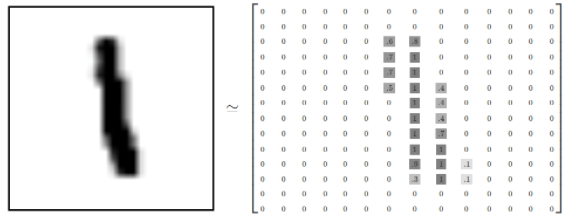

##**신경망 학습을 위한 출력데이터  one-hot 벡터 변환하기**

In [ ]:
y_train = keras.utils.to_categorical(Y_train, 10)
y_test = keras.utils.to_categorical(Y_test, 10)
print("훈련 데이터 : \n{} ".format(y_train))
print("테스트 데이터: \n{} ".format(y_test))

##**신경망 구조 정의하기 - 2개의 히든 레이어(각각의 뉴런 수 32, 16)**

In [ ]:
model = keras.Sequential( )
model.add(layers.Dense(units=2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(units=1))
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(units=10))
model.add(layers.Activation('softmax'))

##**신경망 모형의 학습 매개변수 정의 – 손실함수, 최적화 알고리즘 등의 정의**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

##**신경망 모형 학습하기**

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=25, validation_data=(x_test, y_test))

In [ ]:
print(model.summary())

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

##**history 변수에 저장되어 있는 학습결과 변수 확인하기'**

In [ ]:
print(history.history.keys())

##**Epoch별 모델 Acccuracy, Loss 그래프 작성**

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy by Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'], loc='upper left')
plt.show()

##**테스트 데이터를 활용하여 모델의 성능평가 하기**

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

##**테스트 데이터를 활용하여  교차표 작성하기**

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
Y_pred=np.argmax(y_pred, axis=1)
Y_test=np.argmax(y_test, axis=1)

In [ ]:
Y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(cm, square=True, annot=True, cbar=True, ax=ax)
plt.xlabel('Predicted value')
plt.ylabel('True value')

##**모델의 성능 평가 보고서 확인하기**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))